In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpmax, fpgrowth

# Question 1

In [83]:
def clean_row(row) -> list:

    cleaned_row = []
    if (4.30 <= float(row[0]) <= 5.55):
        cleaned_row.append('sl1')
    elif (5.55 < float(row[0]) <= 6.15):
        cleaned_row.append('sl2')
    elif (6.15 < float(row[0]) <= 7.90):
        cleaned_row.append('sl3')
    else:
        cleaned_row.append(None)

    if(2.00 <= float(row[1]) <= 2.95):
        cleaned_row.append('sw1')
    elif (2.95 < float(row[1]) <= 3.35):
        cleaned_row.append('sw2')
    elif (3.35 < float(row[1]) <= 4.40):
        cleaned_row.append('sw3')
    else:
        cleaned_row.append(None)

    if (1.00 <= float(row[2]) <= 2.45):
        cleaned_row.append('pl1')
    elif (2.45 < float(row[2]) <= 4.75):
        cleaned_row.append('pl2')
    elif (4.75 < float(row[2]) <= 6.90):
        cleaned_row.append('pl3')
    else:
        cleaned_row.append(None)

    if (0.10 <= float(row[3]) <= 0.80):
        cleaned_row.append('pw1')
    elif (0.80 < float(row[3]) <= 1.75):
        cleaned_row.append('pw2')
    elif ( 1.75 < float(row[3]) <= 2.50):
        cleaned_row.append('pw3')
    else:
        cleaned_row.append(None)

    if(row[4] == 'setosa'):
        cleaned_row.append('c1')
    elif(row[4] == 'versicolor'):
        cleaned_row.append('c2')
    elif(row[4] == 'virginica'):
        cleaned_row.append('c3')
    else:
        cleaned_row.append(None)

    return cleaned_row


In [84]:
iris_ds = pd.read_csv('datasets/iris.csv',sep=',',header=0)
iris_ds.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [85]:
te = TransactionEncoder()
cleaned_ds = []
for i in range(0, len(iris_ds)):
    cleaned_row = clean_row(iris_ds.iloc[i])
    cleaned_ds.append(cleaned_row)


te_ary = te.fit(cleaned_ds).transform(cleaned_ds)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(10)

,c1,c2,c3,pl1,pl2,pl3,pw1,pw2,pw3,sl1,sl2,sl3,sw1,sw2,sw3
0,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
1,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
2,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
4,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
5,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
6,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
7,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
8,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
9,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False


# Question 2

In [86]:
minsup = (10/len(df)) #Pas certain de ça
print("minsup = ", minsup, "%")

FI = apriori(df, min_support=0.1, use_colnames=True)

AR = association_rules(FI, metric="lift", min_threshold=0.1)

def class_as_consequent(x) -> bool:
    return len(x) == 1 and list(x)[0] in ['c1', 'c2', 'c3']

class_association = AR["consequents"].map(class_as_consequent)
AR = AR[class_association]
AR.head(10)

minsup =  0.06666666666666667 %


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(pl1),(c1),0.333333,0.333333,0.333333,1.000000,3.000000,0.222222,inf
3,(pw1),(c1),0.333333,0.333333,0.333333,1.000000,3.000000,0.222222,inf
5,(sl1),(c1),0.393333,0.333333,0.313333,0.796610,2.389831,0.182222,3.277778
6,(sw2),(c1),0.373333,0.333333,0.113333,0.303571,0.910714,-0.011111,0.957265
8,(sw3),(c1),0.246667,0.333333,0.206667,0.837838,2.513514,0.124444,4.111111
11,(pl2),(c2),0.300000,0.333333,0.293333,0.977778,2.933333,0.193333,30.000000
13,(pw2),(c2),0.360000,0.333333,0.326667,0.907407,2.722222,0.206667,7.200000
15,(sl2),(c2),0.240000,0.333333,0.153333,0.638889,1.916667,0.073333,1.846154
17,(sl3),(c2),0.366667,0.333333,0.106667,0.290909,0.872727,-0.015556,0.940171
18,(sw1),(c2),0.380000,0.333333,0.226667,0.596491,1.789474,0.100000,1.652174


# Question 3

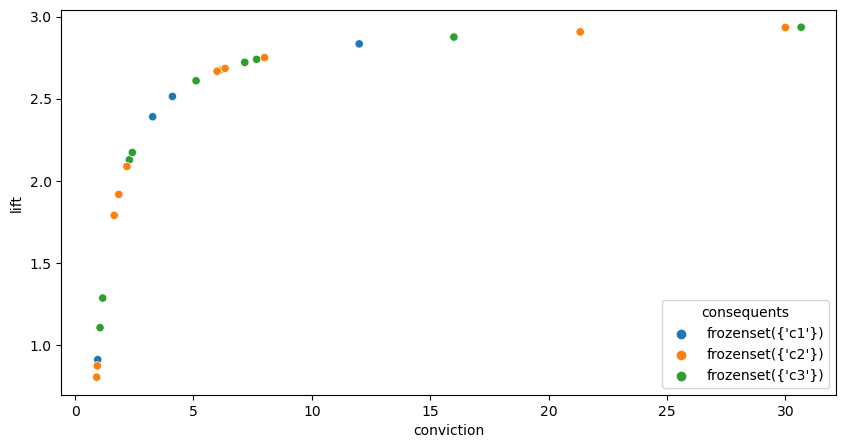

In [87]:
#Display lineplot lift vs conviction
plt.figure(figsize=(10, 5))
sns.scatterplot(x='conviction', y='lift', data=AR, hue="consequents")
plt.show()

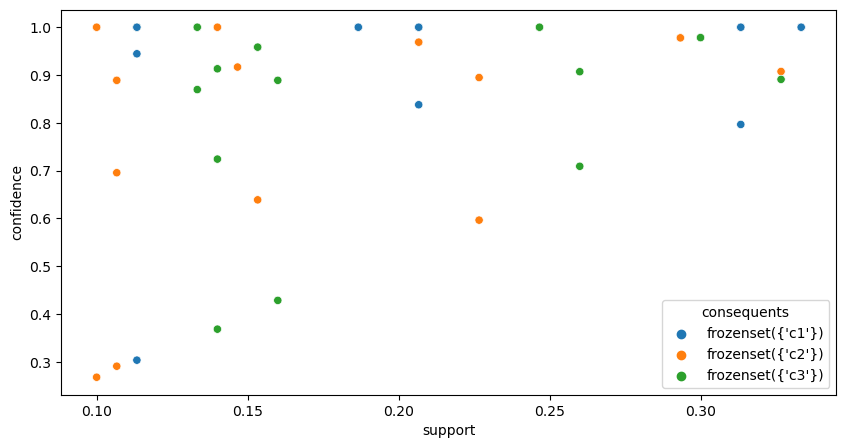

In [88]:
#Display rsup vs conf 
plt.figure(figsize=(10, 5))
sns.scatterplot(x='support', y='confidence', data=AR, hue="consequents")
plt.show()

# Question 4

In [89]:
ar_max_antecedents = AR["antecedents"].map(lambda x: len(x) == 4)
AR_max_antecedents = AR[ar_max_antecedents]

AR_max_antecedents.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
612,"(sw2, sl1, pl1, pw1)",(c1),0.113333,0.333333,0.113333,1.0,3.0,0.075556,inf
642,"(sw3, sl1, pl1, pw1)",(c1),0.186667,0.333333,0.186667,1.0,3.0,0.124444,inf
674,"(sw1, pw2, sl2, pl2)",(c2),0.100000,0.333333,0.100000,1.0,3.0,0.066667,inf
704,"(pl3, sw2, pw3, sl3)",(c3),0.133333,0.333333,0.133333,1.0,3.0,0.088889,inf


# Question 5

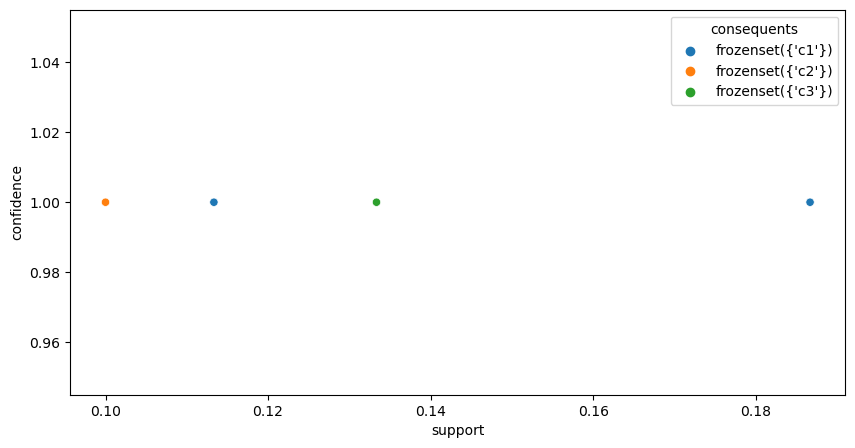

In [90]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='support', y='confidence', data=AR_max_antecedents, hue="consequents")
plt.show()